In [8]:
import clingo
import clingraph
import clingo.ast
import clingraph.orm
from clingraph.orm import Factbase
from clingraph.graphviz import compute_graphs

In [9]:
cnr_graphs = """

graph(program1).
graph(program2).

node("C", program1).
node("q", program1).
node("r", program1).
node("p", program1).

edge(("C", "p"), program1).
edge(("p", "C"), program1).
edge(("r", "C"), program1).
edge(("q", "C"), program1).

edge_sign(("C", "p"), positive, program1).
edge_sign(("p", "C"), negative, program1).
edge_sign(("r", "C"), negative, program1).
edge_sign(("q", "C"), positive, program1).

node("C", program2).
node("q", program2).
node("r", program2).
node("p", program2).

edge(("C", "p"), program2).
edge(("p", "C"), program2).
edge(("q", "C"), program2).
edge(("r", "p"), program2).

edge_sign(("C", "p"), positive, program2).
edge_sign(("p", "C"), negative, program2).
edge_sign(("q", "C"), positive, program2).
edge_sign(("r", "p"), negative, program2).

attr(edge, E, dir, forward) :- edge(E).
attr(edge, E, dir, forward) :- edge(E,_).
attr(edge, E, label, "+") :- edge(E), edge_sign(E, positive).
attr(edge, E, label, "+") :- edge(E, G), edge_sign(E, positive, G).
attr(edge, E, label, "-") :- edge(E), edge_sign(E, negative).
attr(edge, E, label, "-") :- edge(E, G), edge_sign(E, negative, G).

attr(node, N, style, filled) :- node(N), "A" <= N, N <= "Z".
attr(node, N, color, black) :- node(N), "A" <= N, N <= "Z".
attr(node, N, fontcolor, white) :- node(N), "A" <= N, N <= "Z".

attr(node, N, style, filled) :- node(N,_), "A" <= N, N <= "Z".
attr(node, N, color, black) :- node(N,_), "A" <= N, N <= "Z".
attr(node, N, fontcolor, white) :- node(N,_), "A" <= N, N <= "Z".

attr(graph, program1, model, "circuit").
attr(graph, program2, model, "circuit").
"""

In [10]:
ctl = clingo.Control()
ctl.configuration.solve.models = 0
ctl.add('base', [], cnr_graphs)
ctl.ground([('base',())])
fb = Factbase()

<block>:36:32-39: info: atom does not occur in any rule head:
  edge(E)

<block>:38:30-37: info: atom does not occur in any rule head:
  edge(E)

<block>:38:39-61: info: atom does not occur in any rule head:
  edge_sign(E,positive)

<block>:40:30-37: info: atom does not occur in any rule head:
  edge(E)

<block>:40:39-61: info: atom does not occur in any rule head:
  edge_sign(E,negative)

<block>:43:33-40: info: atom does not occur in any rule head:
  node(N)

<block>:44:32-39: info: atom does not occur in any rule head:
  node(N)

<block>:45:36-43: info: atom does not occur in any rule head:
  node(N)



In [11]:
with ctl.solve(yield_=True) as solve_handle:
    models = []
    for model in solve_handle:
        symbols = sorted(model.symbols(shown=True))
        print("Answer {}:".format(model.number), end=' ')
        print("{",
              '\n'.join(map(str, symbols)), "}", sep='\n')
        models.append(symbols)
    solve_result = solve_handle.get()
    fb.add_model(model)
    print(solve_result, end='')
    if models:
        print(" {}{}".format(len(models), '' if solve_result.exhausted else '+'))

Answer 1: {
graph(program1)
graph(program2)
edge(("C","p"),program1)
edge(("C","p"),program2)
edge(("p","C"),program1)
edge(("p","C"),program2)
edge(("q","C"),program1)
edge(("q","C"),program2)
edge(("r","C"),program1)
edge(("r","p"),program2)
node("C",program1)
node("C",program2)
node("p",program1)
node("p",program2)
node("q",program1)
node("q",program2)
node("r",program1)
node("r",program2)
edge_sign(("C","p"),positive,program1)
edge_sign(("C","p"),positive,program2)
edge_sign(("p","C"),negative,program1)
edge_sign(("p","C"),negative,program2)
edge_sign(("q","C"),positive,program1)
edge_sign(("q","C"),positive,program2)
edge_sign(("r","C"),negative,program1)
edge_sign(("r","p"),negative,program2)
attr(edge,("C","p"),dir,forward)
attr(edge,("C","p"),label,"+")
attr(edge,("p","C"),dir,forward)
attr(edge,("p","C"),label,"-")
attr(edge,("q","C"),dir,forward)
attr(edge,("q","C"),label,"+")
attr(edge,("r","C"),dir,forward)
attr(edge,("r","C"),label,"-")
attr(edge,("r","p"),dir,forward)
att

In [12]:
print(fb)

edge(("C","p"),program1).
edge(("p","C"),program1).
edge(("r","C"),program1).
edge(("q","C"),program1).
edge(("C","p"),program2).
edge(("p","C"),program2).
edge(("q","C"),program2).
edge(("r","p"),program2).
node("C",program1).
node("q",program1).
node("r",program1).
node("p",program1).
node("C",program2).
node("q",program2).
node("r",program2).
node("p",program2).
graph(program1).
graph(program2).
attr(edge,("r","p"),(dir,-1),forward).
attr(edge,("q","C"),(dir,-1),forward).
attr(edge,("p","C"),(dir,-1),forward).
attr(edge,("r","C"),(label,-1),"-").
attr(edge,("q","C"),(label,-1),"+").
attr(edge,("C","p"),(label,-1),"+").
attr(graph,program1,(model,-1),"circuit").
attr(edge,("p","C"),(label,-1),"-").
attr(edge,("r","C"),(dir,-1),forward).
attr(edge,("C","p"),(dir,-1),forward).
attr(node,"C",(style,-1),filled).
attr(graph,program2,(model,-1),"circuit").
attr(node,"C",(color,-1),black).
attr(edge,("r","p"),(label,-1),"-").
attr(node,"C",(fontcolor,-1),white).



In [13]:
graphs = compute_graphs(fb)
graphs

{'program1': <graphviz.graphs.Graph at 0x7f1ddbed55a0>,
 'program2': <graphviz.graphs.Graph at 0x7f1ddbed6dd0>}

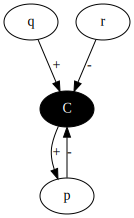

In [14]:
graphs['program1']

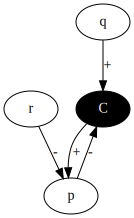

In [15]:
graphs['program2']

In [ ]:
program1 = """
p :- q, not r, not p.
"""

program2 = """
p :- q, not p.
p :- not r.
"""